# Buildings network

In [1]:
from Building import Building
%matplotlib inline

## Load the buildings from OpenStreetMap

#### Option 1: load the buildings within some distance north, south, east, and west of a lat-long point.

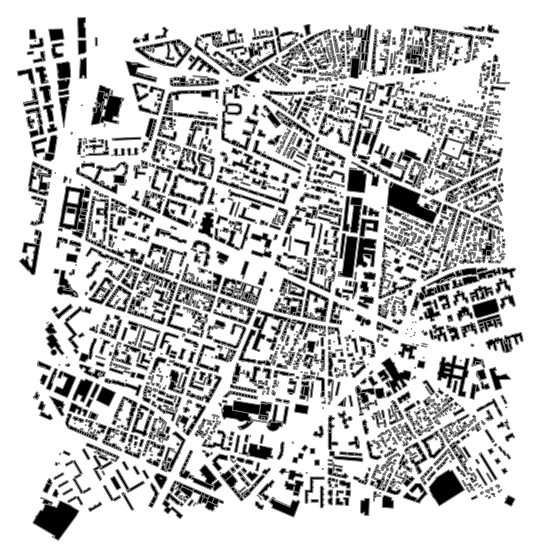

In [2]:
point_coords = (45.745591, 4.871167) # latitude and longitude of Montplaisir-Lumière, Lyon (France)
distance = 1000 # in meters

B = Building(point_coords, distance=distance)
B.download_buildings()
B.plot_buildings(save=False)

#### Option 2: load the buildings within the boundaries of some place.

In [3]:
# uncomment to load buildings from place
# place_name = "Lyon"
# B = Building(place_name=place_name)

## Define the *Buildings network* nodes

To simplify the geometry:
- merge blocks of buildings (adjacent buildings)
- take the convex hull

When taking the convex hull, some new intersections can form. Iteratively merge and take the convex hull until no intersections are found (i.e., until the number of buildings remains the same).

Unary_union does not merge polygons that share only one vertex. To avoid this, I dilate all polygons of a small quantity.

In [4]:
buffer = 0.01 # 1 cm
B.merge_and_convex(buffer=buffer)

0 5565
1 1945
2 1517
3 1393
4 1357
5 1338
6 1328
7 1318
8 1314
9 1312
10 1310
11 1309
12 1309


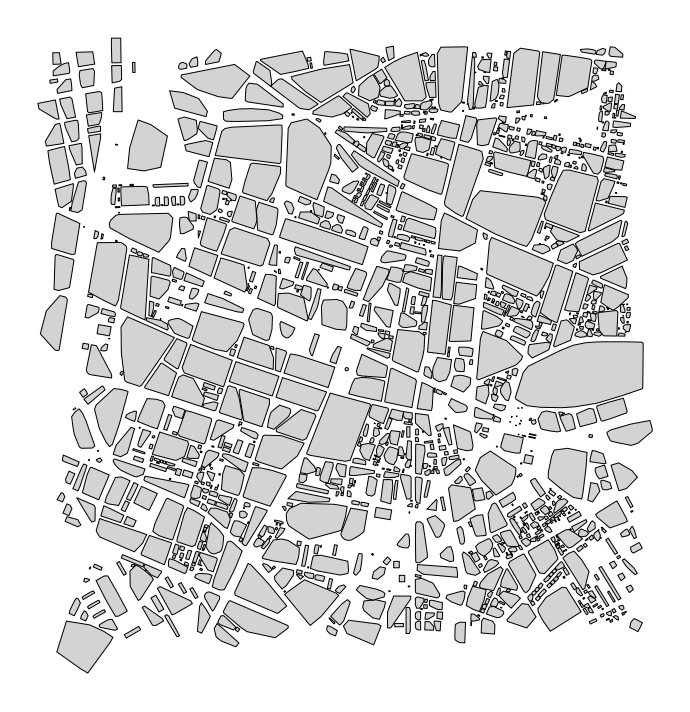

In [5]:
B.plot_merged_buildings(save=False)

Each (merged) building corresponds to one node.

#### Visualize nodes:

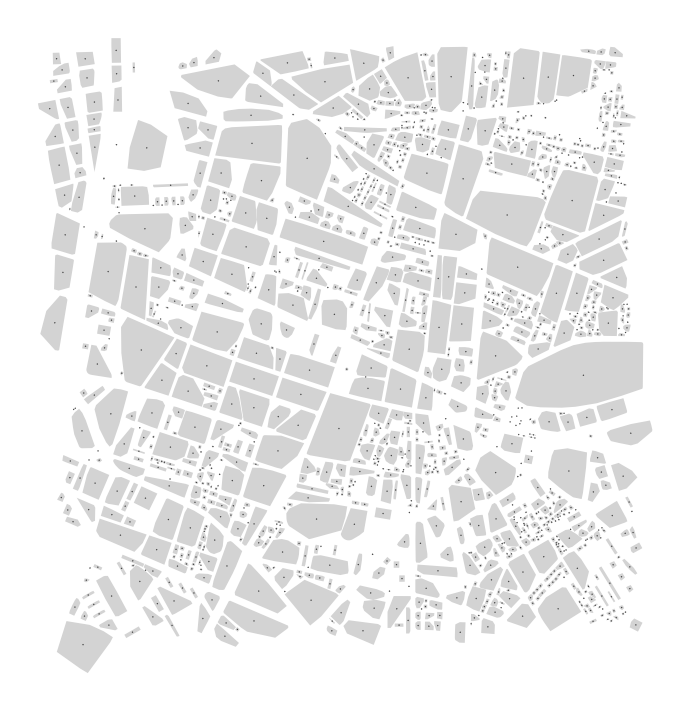

In [6]:
B.assign_nodes()
B.plot_nodes(save=False)

## Define the *Building network* links

Two nodes are connected if they have at least a couple of points at distance < distance_threshold.
The links between two buildings whose cenroids' connecting segment crosses a third building are removed: in this way, links do not exist between buildings that have other buildings in between them (e.g., belonging to different narrow streets, parallel one to another).

In [7]:
distance_threshold = 30 # in meters

NOTE: the distance threshold is applied after buffering (but of a very small quantity!)

Definition of the pairwise weights:

For a given link $(b_i, b_j)$:

- buffer $b_i$ of distance equal to the distance threshold used to determine the links
- calculate the area $A_i$ of intersection with $b_j$
- same for $b_j$
- sum the two areas

$$w_{b_i, b_j} = A_i + A_j$$

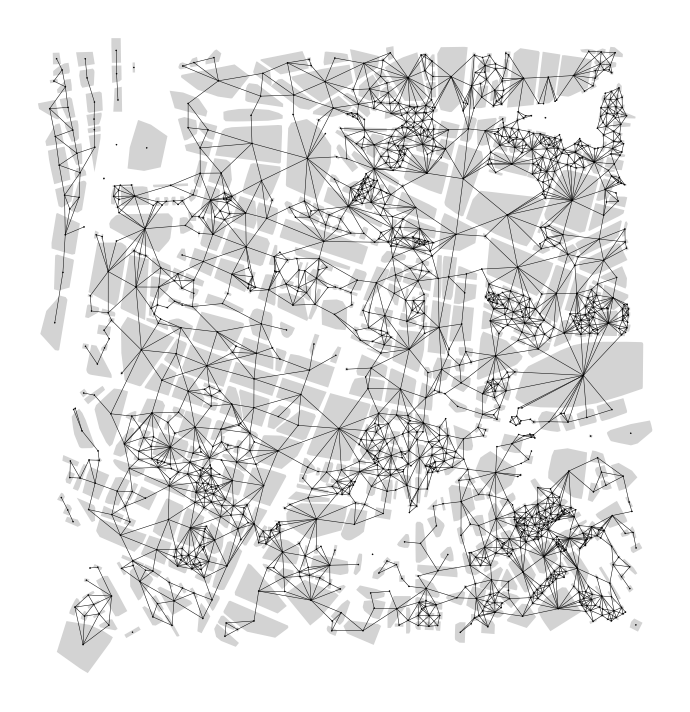

In [8]:
B.assign_edges_weights(distance_threshold=distance_threshold)
B.plot_edges(save=False)

## Create the *Buildings network* graph:

Note: isolated nodes are removed from the network.

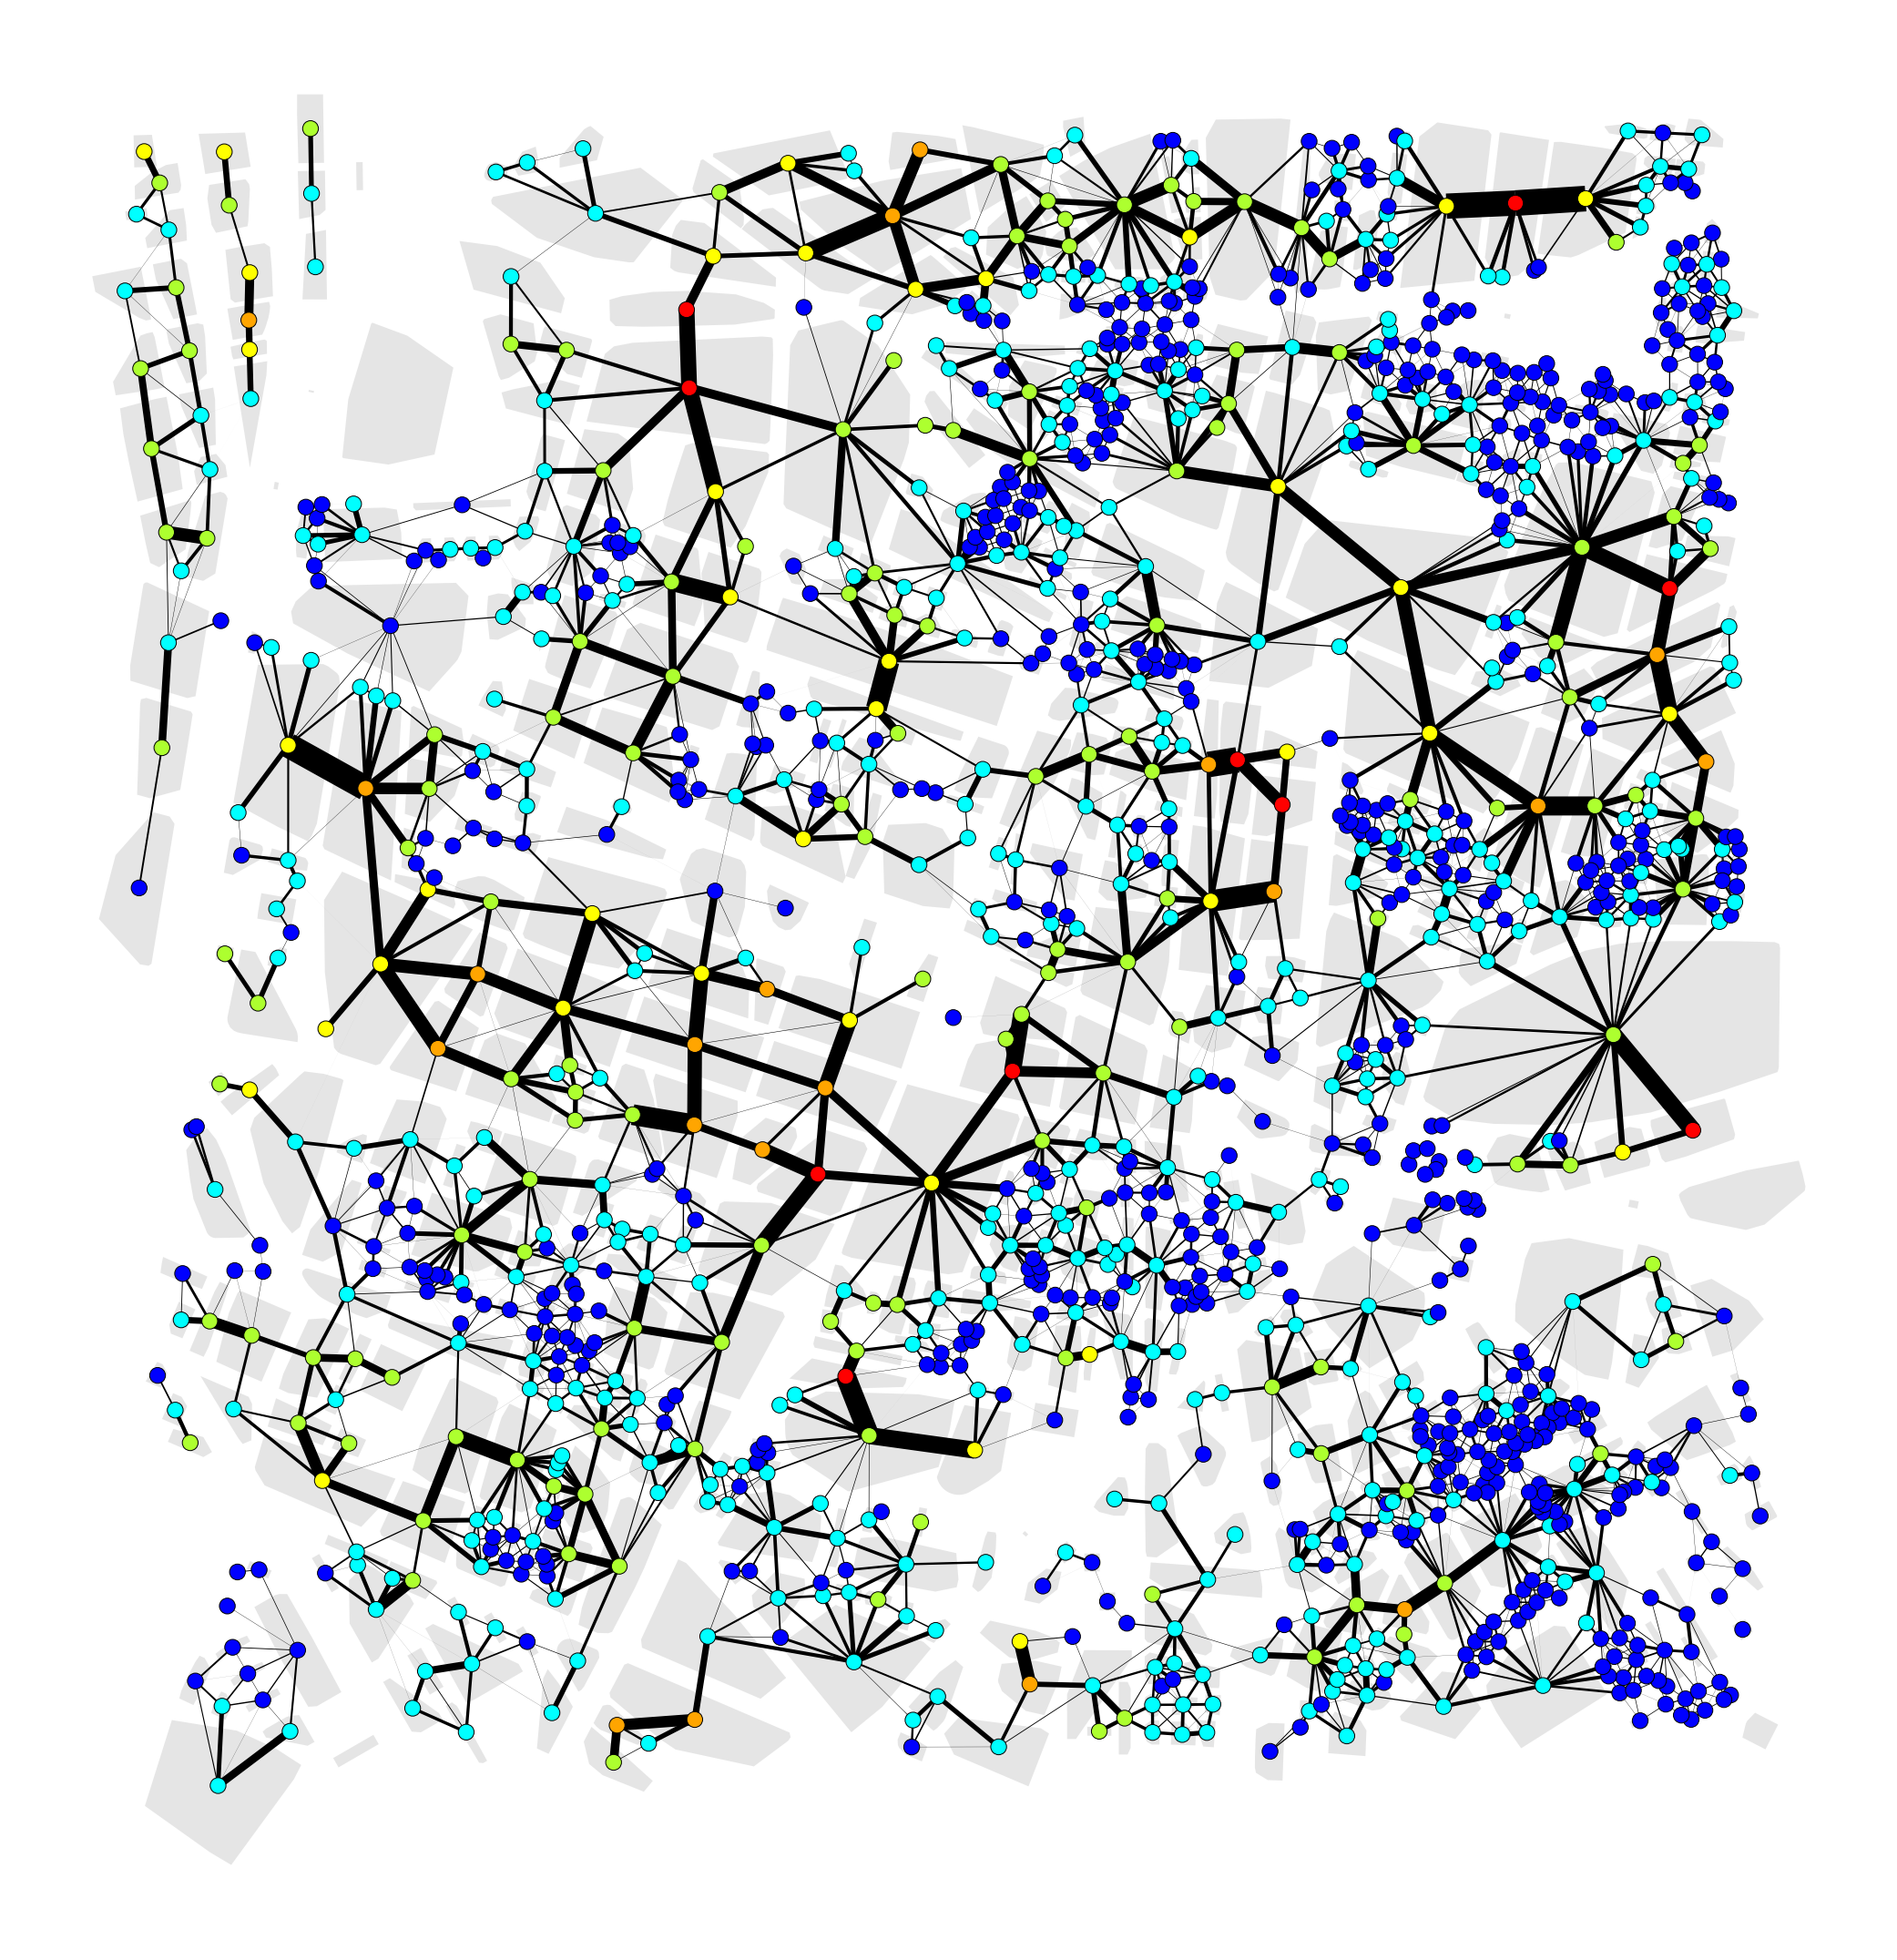

In [9]:
B.assign_network()
B.plot_net(save=False)

#### Node color: value of neighborhood watch (w/k)

Legend:

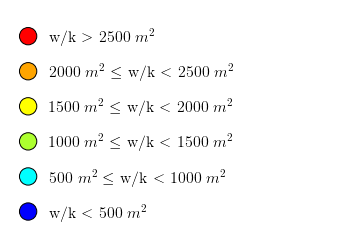

In [10]:
B.plot_nodes_legend(save=False)

Color buildings based on the value of w/k

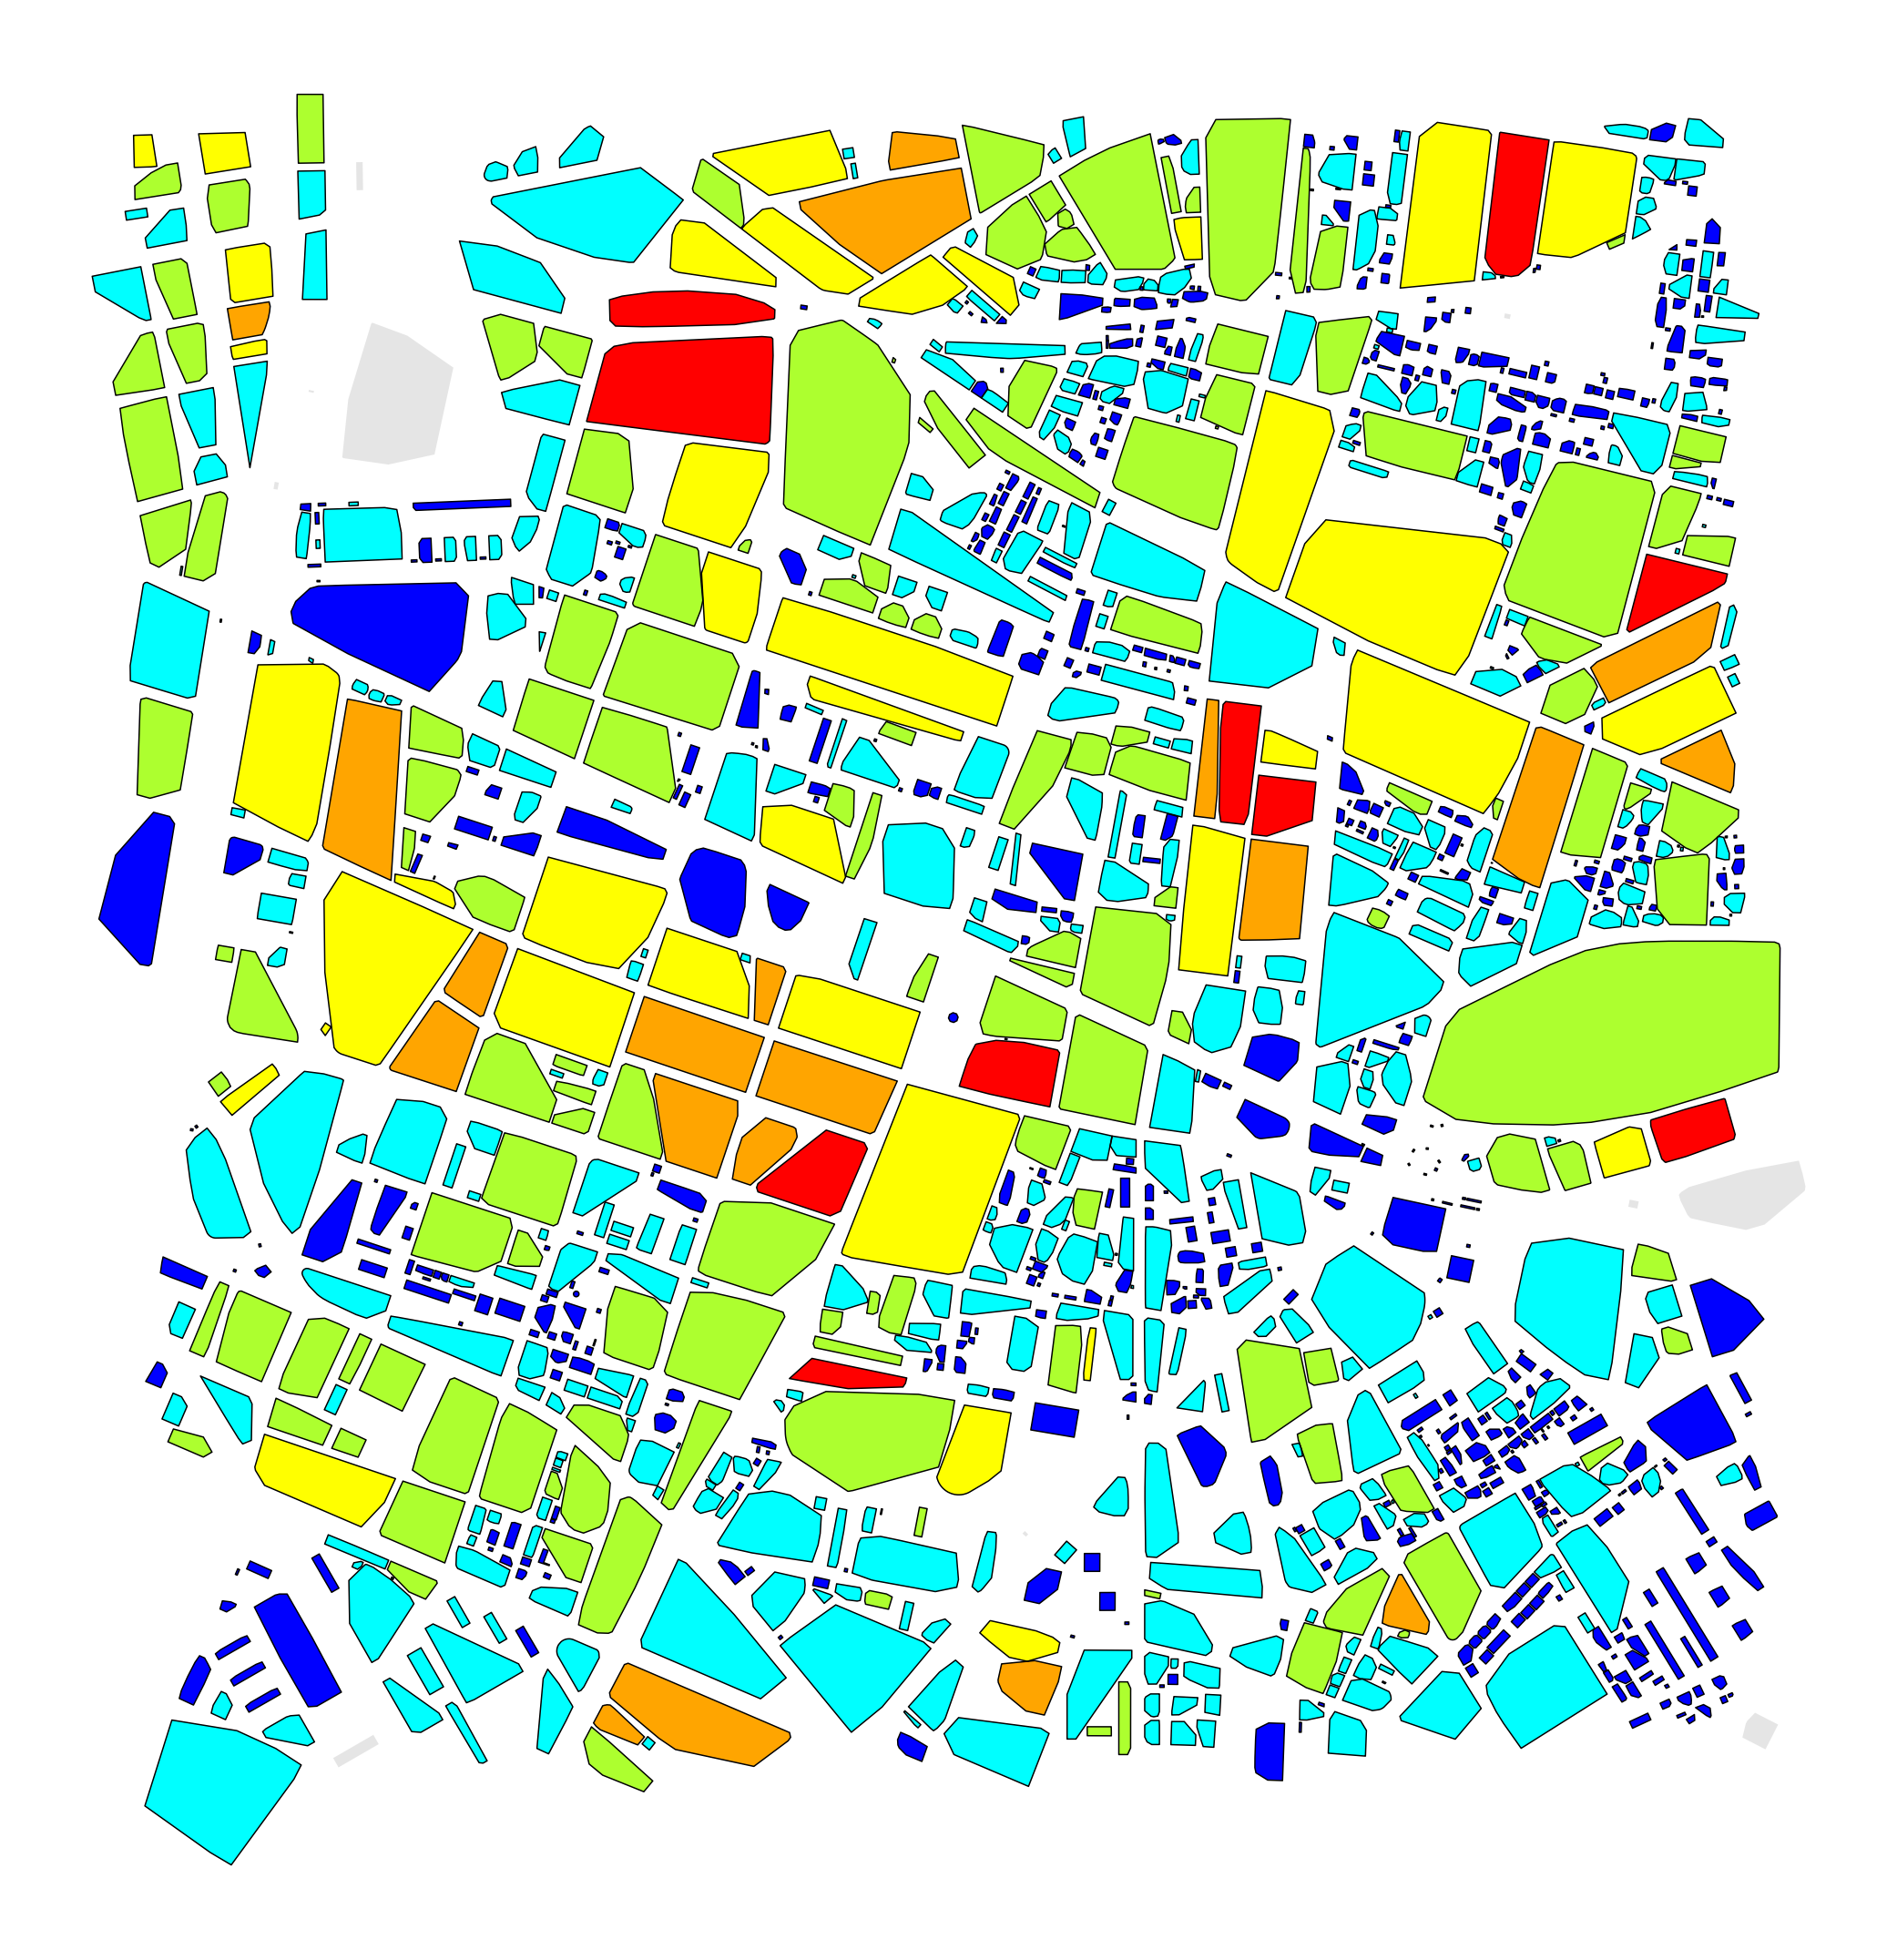

In [11]:
B.plot_buildings_color(save=False)

#### Edge color: link weight

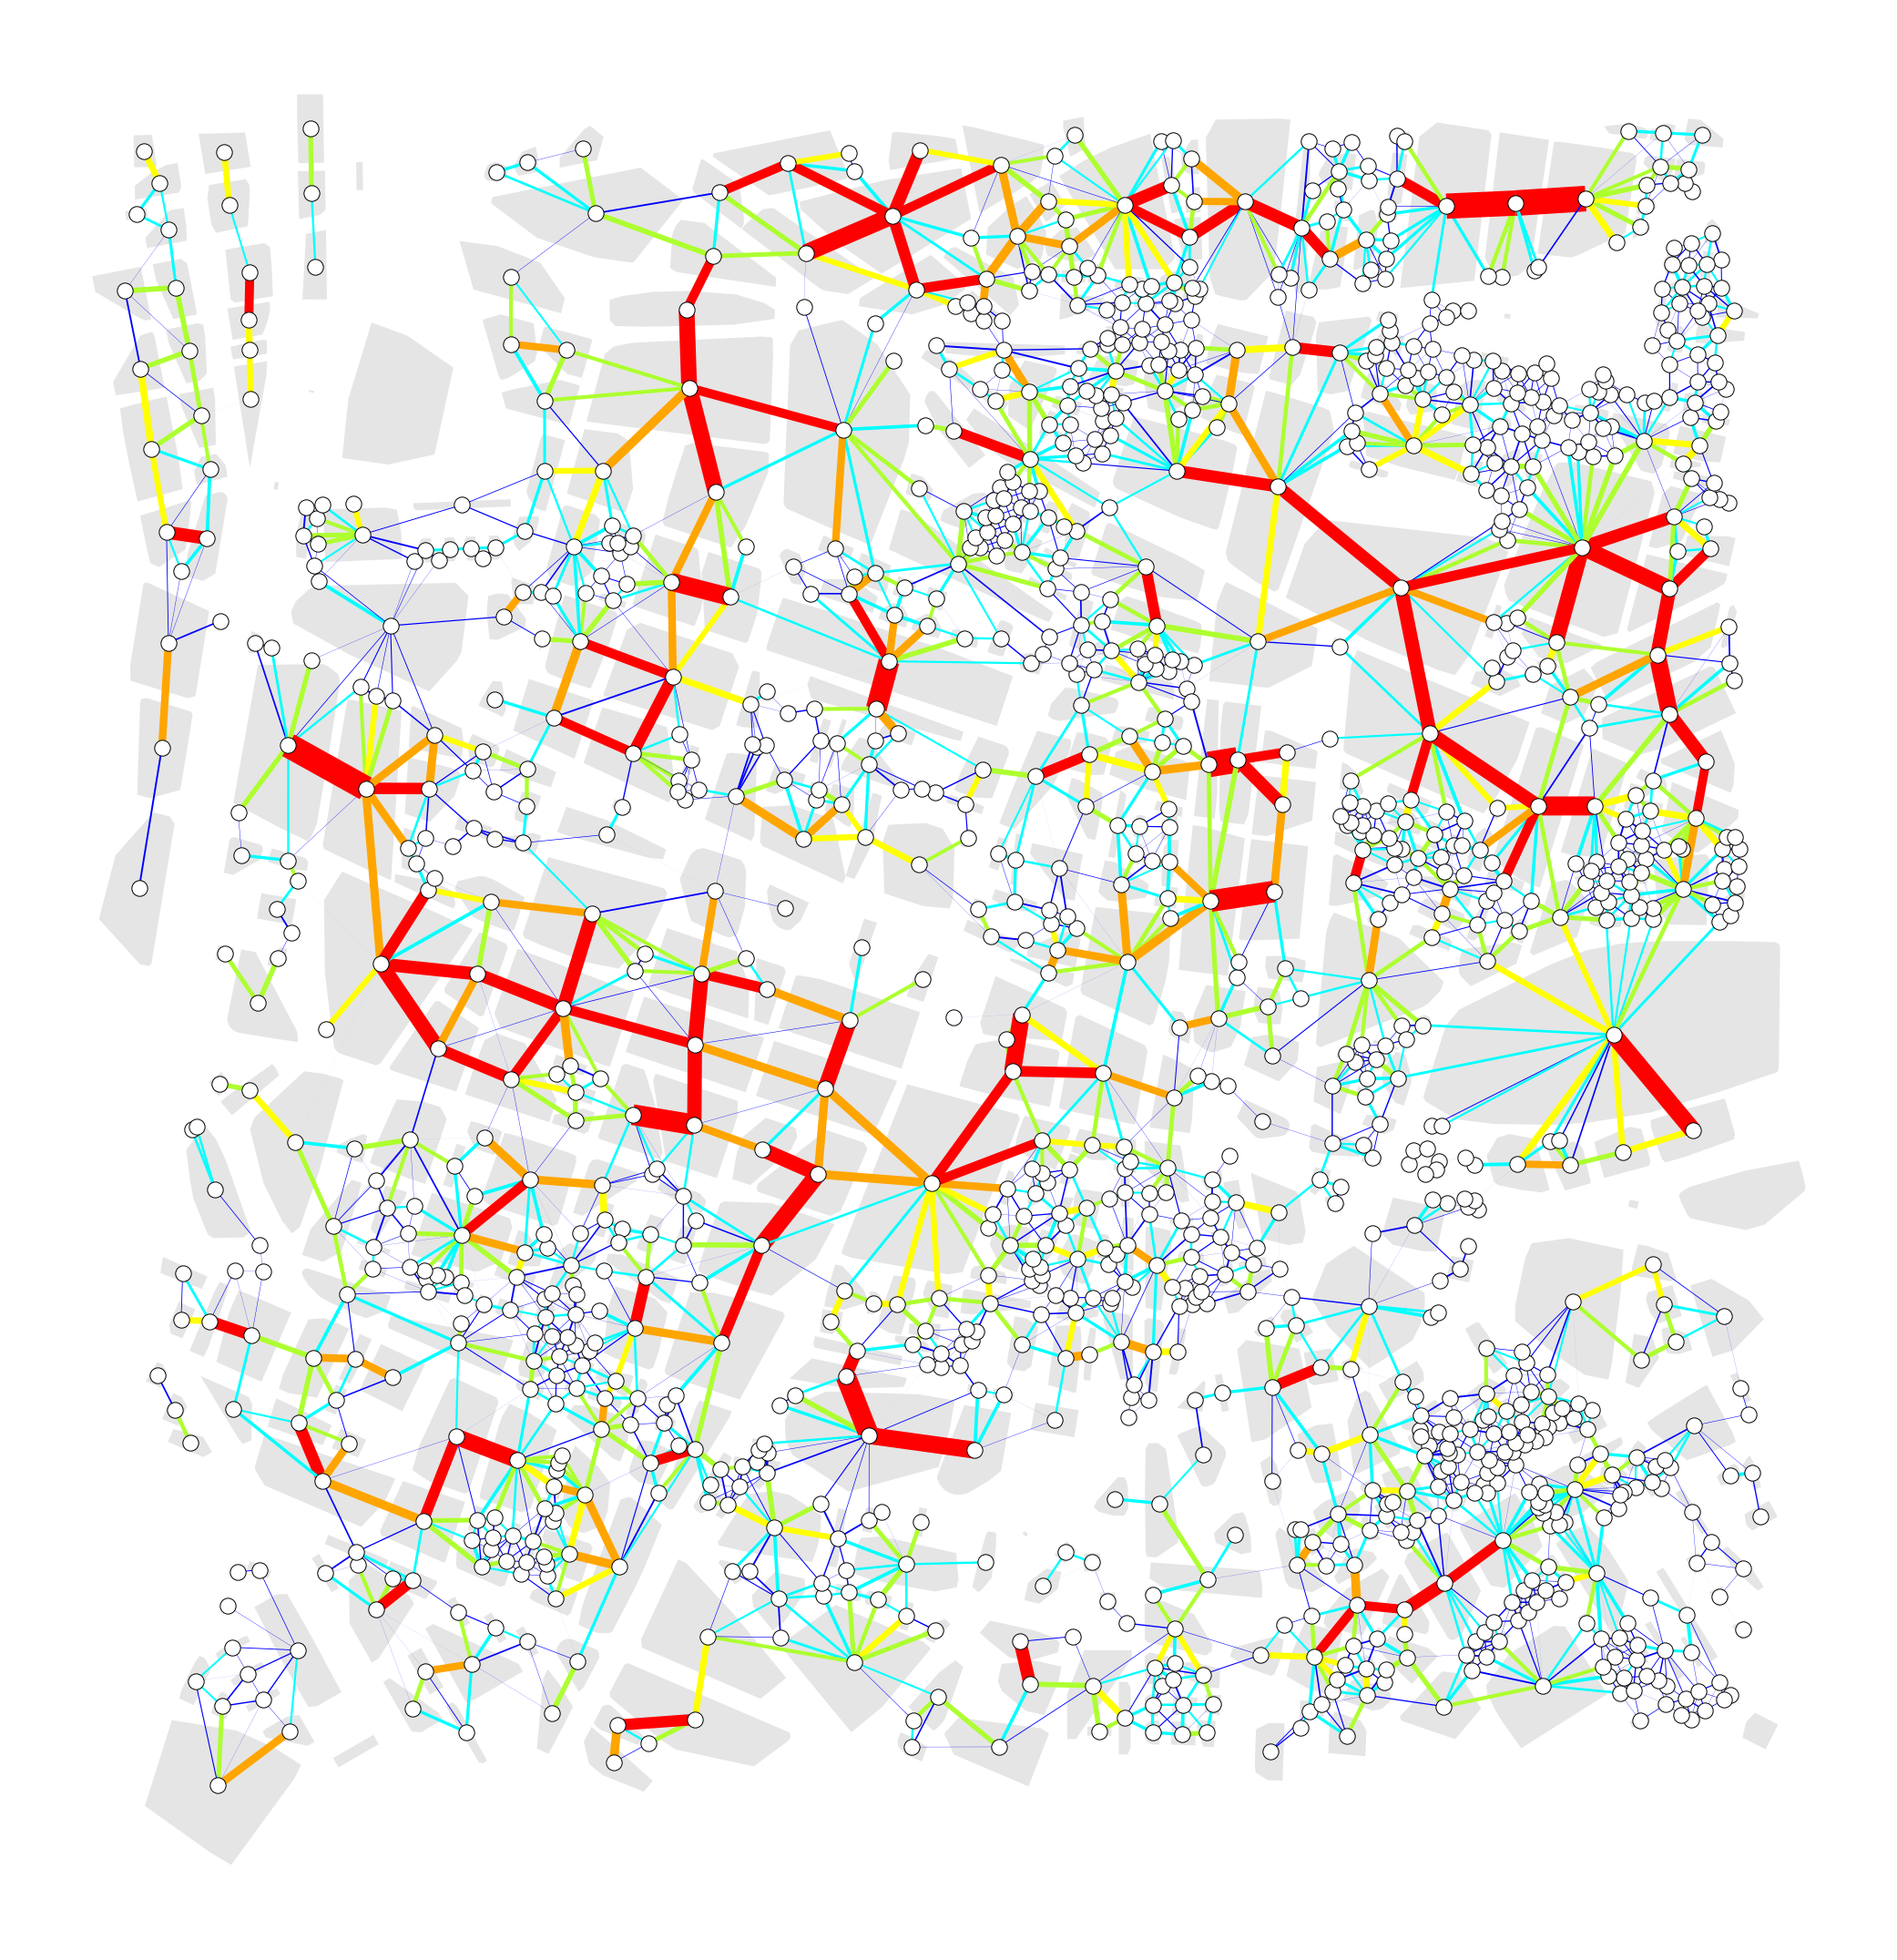

In [12]:
B.plot_net(style="edge_color", save=False)

Legend:

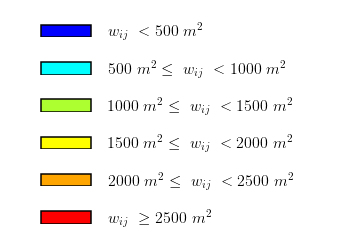

In [13]:
B.plot_edges_legend(save=False)